In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.describe()

,bath,balcony,price
count,13167.000000,12635.000000,13240.000000
mean,2.691501,1.583854,112.493455
std,1.343284,0.817913,149.206816
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13240 non-null  object 
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    12993 non-null  float64
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [8]:
le = LabelEncoder()

In [9]:
size = df['size'].str.split(expand=True)
size.columns = ['v_size','c_size']
df = pd.concat([df,size],axis=1)
df['c_size'] = le.fit_transform(df['c_size'])
df = df.drop('size',axis=1)

In [10]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,v_size,c_size
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,1
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2,0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5,1
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,5.0,NaN,400.00,4,0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689.0,4.0,1.0,488.00,4,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    12993 non-null  float64
 5   bath          13167 non-null  float64
 6   balcony       12635 non-null  float64
 7   price         13240 non-null  float64
 8   v_size        13224 non-null  object 
 9   c_size        13320 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ MB


In [12]:
df['v_size'] = pd.to_numeric(df['v_size'],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    12993 non-null  float64
 5   bath          13167 non-null  float64
 6   balcony       12635 non-null  float64
 7   price         13240 non-null  float64
 8   v_size        13224 non-null  float64
 9   c_size        13320 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.0+ MB


In [14]:
df['area_type'] = le.fit_transform(df['area_type'])
df['society'] = le.fit_transform(df['society'])
df = df.drop('availability',axis=1)
df = df.drop('location',axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  int64  
 1   society     13320 non-null  int64  
 2   total_sqft  12993 non-null  float64
 3   bath        13167 non-null  float64
 4   balcony     12635 non-null  float64
 5   price       13240 non-null  float64
 6   v_size      13224 non-null  float64
 7   c_size      13320 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 832.6 KB


In [16]:
df.loc[df.price<= 50,'Price'] ='bajo'
df.loc[df.price>= 120,'Price'] ='alto'
df['Price'] = le.fit_transform(df['Price'])
df = df.drop('price',axis=1)

In [17]:
df

,area_type,society,total_sqft,bath,balcony,v_size,c_size,Price
0,73,464,1056.0,2.0,1.0,2.0,0,1
1,57,2439,2600.0,5.0,3.0,4.0,1,0
2,0,2688,1440.0,2.0,3.0,3.0,0,2
3,73,2186,1521.0,3.0,1.0,3.0,0,2
4,73,2688,1200.0,2.0,1.0,2.0,0,2
...,...,...,...,...,...,...,...,...
13315,0,209,3453.0,4.0,0.0,5.0,1,0
13316,73,2688,3600.0,5.0,NaN,4.0,0,0
13317,0,1216,1141.0,2.0,1.0,2.0,0,2
13318,73,2205,4689.0,4.0,1.0,4.0,0,0


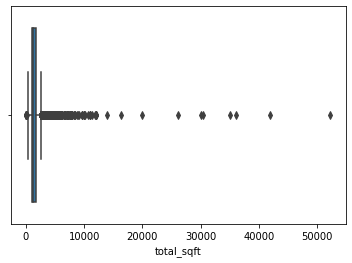

In [18]:
sns.boxplot(x=df['total_sqft'])

In [19]:
df_copy = df.copy()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


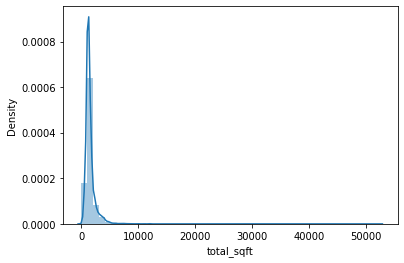

In [20]:
sns.distplot(df_copy['total_sqft'])

In [21]:
Q1 = df_copy['total_sqft'].quantile(0.25)
Q3 = df_copy['total_sqft'].quantile(0.75)
IQR = Q3-Q1
LR = Q1-(1.1*IQR)
UR = Q3-(1.1*IQR)
df_copy.drop(df_copy[(df_copy.total_sqft>UR)|(df_copy.total_sqft<LR)].index,inplace=True)


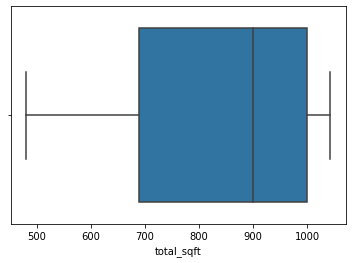

In [22]:
sns.boxplot(x=df_copy['total_sqft'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


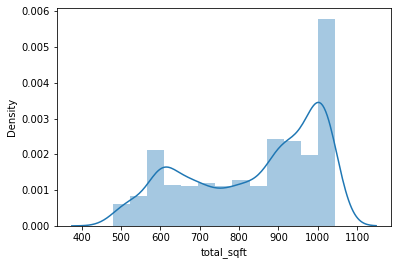

In [23]:
sns.distplot(df_copy['total_sqft'])

In [24]:
df_copy

,area_type,society,total_sqft,bath,balcony,v_size,c_size,Price
9,57,2688,1020.0,6.0,NaN,6.0,1,0
12,73,2089,1000.0,2.0,1.0,2.0,0,1
20,0,2688,600.0,1.0,1.0,1.0,0,1
24,73,296,510.0,1.0,0.0,1.0,2,1
26,73,918,660.0,1.0,1.0,2.0,0,1
...,...,...,...,...,...,...,...,...
13298,73,191,1015.0,2.0,2.0,2.0,0,2
13299,73,1636,NaN,5.0,0.0,4.0,0,0
13303,57,2688,774.0,5.0,3.0,5.0,1,2
13305,56,2688,500.0,1.0,3.0,1.0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


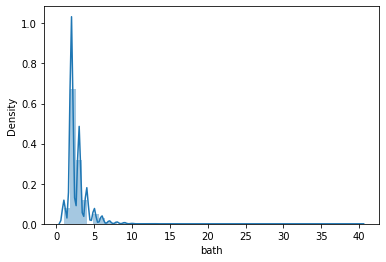

In [25]:
sns.distplot(df['bath'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


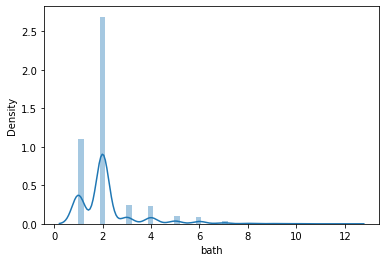

In [26]:
sns.distplot(df_copy['bath'])

In [27]:
df_copy

,area_type,society,total_sqft,bath,balcony,v_size,c_size,Price
9,57,2688,1020.0,6.0,NaN,6.0,1,0
12,73,2089,1000.0,2.0,1.0,2.0,0,1
20,0,2688,600.0,1.0,1.0,1.0,0,1
24,73,296,510.0,1.0,0.0,1.0,2,1
26,73,918,660.0,1.0,1.0,2.0,0,1
...,...,...,...,...,...,...,...,...
13298,73,191,1015.0,2.0,2.0,2.0,0,2
13299,73,1636,NaN,5.0,0.0,4.0,0,0
13303,57,2688,774.0,5.0,3.0,5.0,1,2
13305,56,2688,500.0,1.0,3.0,1.0,0,0


In [28]:
df_copy.isnull().sum()

area_type       0
society         0
total_sqft    327
bath          141
balcony       184
v_size         88
c_size          0
Price           0
dtype: int64

In [29]:
df_copy = df_copy.fillna(df_copy.mean())

In [30]:
df_copy.isnull().sum()

area_type     0
society       0
total_sqft    0
bath          0
balcony       0
v_size        0
c_size        0
Price         0
dtype: int64

In [31]:
X = df_copy.drop('Price',axis=1)
y = df_copy['Price']

In [32]:
X = MinMaxScaler().fit(X).transform(X)

In [52]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.3)

In [34]:
y_train = pd.get_dummies(y_train) 
y_test = pd.get_dummies(y_test)

In [35]:
ann = Sequential()
ann.add(Dense(6,activation='relu'))
ann.add(Dense(3,activation='relu'))
ann.add(Dense(3,activation='sigmoid'))
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)




Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: 1.1024 - accuracy: 0.3883 - val_loss: 1.0603 - val_accuracy: 0.5997
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.5902 - val_loss: 1.0261 - val_accuracy: 0.6010
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.5902 - val_loss: 0.9978 - val_accuracy: 0.6010
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.9833 - accuracy: 0.5902 - val_loss: 0.9750 - val_accuracy: 0.6010
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.9613 - accuracy: 0.5902 - val_loss: 0.9556 - val_accuracy: 0.6010
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.5902 - val_loss: 0.9396 - val_accuracy: 0.6010
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.5902 - val_loss: 0.9255 - val_accuracy: 0.6010
Epoch 8/100
9

In [36]:
y.value_counts()

1    1575
2     872
0     207
Name: Price, dtype: int64

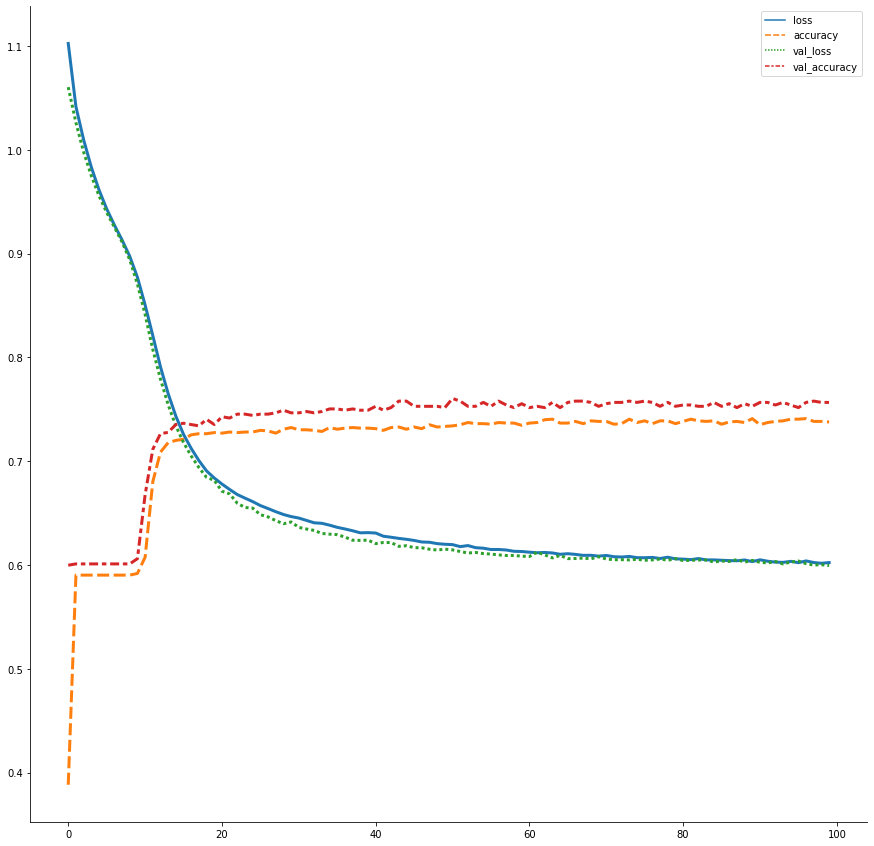

In [37]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,15))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [38]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [39]:
for i in range(len(y_pred_train)):
  index = list(y_pred_train[i]).index(max(y_pred_train[i]))
  for j in range(len(y_pred_train[i])):
    y_pred_train[i][j] = 0
  y_pred_train[i][index] = 1

for i in range(len(y_pred_test)):
  index = list(y_pred_test[i]).index(max(y_pred_test[i]))
  for j in range(len(y_pred_test[i])):
    y_pred_test[i][j] = 0
  y_pred_test[i][index] = 1

In [40]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.21      0.30       135
           1       0.78      0.94      0.85      1096
           2       0.67      0.51      0.58       626

   micro avg       0.74      0.74      0.74      1857
   macro avg       0.67      0.55      0.58      1857
weighted avg       0.72      0.74      0.72      1857
 samples avg       0.74      0.74      0.74      1857



In [41]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.24      0.35        72
           1       0.80      0.96      0.87       479
           2       0.65      0.52      0.58       246

   micro avg       0.76      0.76      0.76       797
   macro avg       0.71      0.57      0.60       797
weighted avg       0.74      0.76      0.73       797
 samples avg       0.76      0.76      0.76       797



In [42]:
y_test

,0,1,2
970,0,1,0
6319,0,0,1
1173,0,0,1
1483,0,1,0
1936,0,1,0
...,...,...,...
7331,1,0,0
4547,0,1,0
9408,0,0,1
13158,0,1,0


In [43]:
y_pred_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [44]:
y_pred_test.argmax(axis=1)

array([1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [45]:
multilabel_confusion_matrix(y_test,y_pred_test)

array([[[717,   8],
        [ 55,  17]],

       [[200, 118],
        [ 20, 459]],

       [[483,  68],
        [119, 127]]])

In [46]:
from mlxtend.evaluate import confusion_matrix as confusion_matrix2


In [47]:
confusion_matrix2(y_train.to_numpy().argmax(axis=1),y_pred_train.argmax(axis=1),binary=True, 
                      positive_label=1)

array([[ 463,  298],
       [  62, 1034]])

In [51]:
y_train

,0,1,2
7001,1,0,0
2395,0,1,0
5647,0,1,0
12817,0,1,0
6039,0,1,0
...,...,...,...
9957,0,0,1
10643,0,1,0
9518,0,0,1
7320,0,0,1


In [50]:
y_pred_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

classificacion

ANN = y dummies 

SVC y KNC  = y labelEncoder

In [53]:
y_train

7001     0
2395     1
5647     1
12817    1
6039     1
        ..
9957     2
10643    1
9518     2
7320     2
8380     2
Name: Price, Length: 1857, dtype: int64

#SVC

In [54]:
svc = SVC(kernel = 'linear',probability=True)# kernels=linear rbf sigmoid poly
svc.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [56]:
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)

In [58]:
accuracy_score(y_train,y_pred_train_svc)

0.7318255250403877

In [59]:
accuracy_score(y_test,y_pred_test_svc)

0.7427854454203262

In [60]:
print(classification_report(y_train,y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.78      0.21      0.33       135
           1       0.76      0.95      0.84      1096
           2       0.65      0.47      0.55       626

    accuracy                           0.73      1857
   macro avg       0.73      0.54      0.57      1857
weighted avg       0.72      0.73      0.70      1857



In [61]:
print(classification_report(y_test,y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.88      0.21      0.34        72
           1       0.77      0.96      0.85       479
           2       0.64      0.48      0.55       246

    accuracy                           0.74       797
   macro avg       0.76      0.55      0.58       797
weighted avg       0.74      0.74      0.71       797



In [65]:
confusion_matrix(y_train,y_pred_train_svc)

array([[  28,    8,   99],
       [   0, 1036,   60],
       [   8,  323,  295]])

In [64]:
confusion_matrix(y_test,y_pred_test_svc)

array([[ 15,  11,  46],
       [  0, 459,  20],
       [  2, 126, 118]])

In [66]:
import numpy as np

error = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_predict_test_knn = knn.predict(X_test)
  error.append(np.mean(y_predict_test_knn!=y_test))

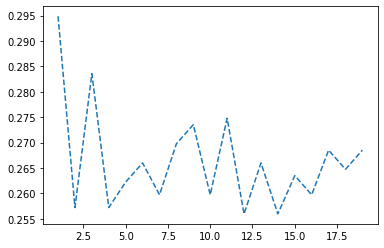

In [67]:
plt.plot(range(1,20),error,linestyle='dashed')

#KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=4, metric="euclidean")#distancia 
knn.fit(X_train,y_train)
y_predict_train_knn = knn.predict(X_train)
y_predict_test_knn = knn.predict(X_test)

In [72]:
accuracy_score(y_train,y_predict_train_knn)

0.8169089929994615

In [73]:
accuracy_score(y_test,y_predict_test_knn)

0.7427854454203262

In [69]:
print(classification_report(y_train,y_predict_train_knn))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       135
           1       0.82      0.97      0.89      1096
           2       0.85      0.58      0.69       626

    accuracy                           0.82      1857
   macro avg       0.79      0.75      0.76      1857
weighted avg       0.82      0.82      0.81      1857



In [71]:
print(classification_report(y_test,y_predict_test_knn))

              precision    recall  f1-score   support

           0       0.51      0.40      0.45        72
           1       0.79      0.94      0.86       479
           2       0.66      0.45      0.54       246

    accuracy                           0.74       797
   macro avg       0.65      0.60      0.62       797
weighted avg       0.72      0.74      0.72       797



In [70]:
confusion_matrix(y_train,y_predict_train_knn)

array([[  94,   11,   30],
       [   3, 1059,   34],
       [  35,  227,  364]])